# Posterior entropy

In [1]:
# Point Python to the path where we have installed the bad and darc packages
import sys
sys.path.insert(0, '/Users/btvincent/git-local/darc-experiments-python')

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns

import darc
from darc.delayed import models
from darc.designs import DARCDesign
from darc.delayed.designs import Griskevicius2011, Frye, Koffarnus_Bickel, Kirby2009

from darc.data_plotting import plot_delay_without_front_end_delays
from darc_parameter_recovery import simulated_experiment_trial_loop

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Run the simulations

In [3]:
true_params = pd.DataFrame.from_dict({'logk': [-4], 'α': [2]})
N_SIMULATIONS = 50  # should be 500 for the final plot to go in the paper

In [4]:
# create empty lists which will recieve our data. Will eventually become a Long data frame
logk = []
method = []
entropy = []
trial = []

for n in range(N_SIMULATIONS):
    
    # TODO: choose correct prior over logk
    true_params = pd.DataFrame.from_dict({'logk': [norm(-4.5, 1).rvs()], 'α': [2]})
    
    # Kirby ----------------------------------------------------------------------
    design_thing = Kirby2009()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Kirby (2009)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # Griskevicius2011 ----------------------------------------------------------
    design_thing = Griskevicius2011()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Griskevicius et al (2011)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # Koffarnus_Bickel ----------------------------------------------------------
    design_thing = Koffarnus_Bickel()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Koffarnus & Bickel (2014)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # Frye ----------------------------------------------------------
    design_thing = Frye()
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['Frye et al (2016)'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    # our approach --------------------------------------------------------------
    design_thing = DARCDesign(max_trials=30, 
                              RA=list(np.arange(5, 99+1, 1)), 
                              DB=list(np.arange(1, 365, 7)))
    model = models.Hyperbolic(n_particles=5000)
    model.θ_true = true_params
    _, summary_stats = simulated_experiment_trial_loop(design_thing, model)

    # append to lists
    logk += list(summary_stats['logk_median'].values)
    entropy += list(summary_stats['logk_entropy'].values)
    method += list(['our approach'] * summary_stats.shape[0])
    trial += list(summary_stats.index.get_values())
    
    

results = pd.DataFrame.from_dict({'logk': logk, 'trial': trial, 'entropy': entropy, 'method': method})

/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:153: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled+n_times_sampled_iter))
/Users/btvincent/git-local/darc-experiments-python/bad/optimisation.py:226: RuntimeWarning: invalid value encountered in true_divide
  (n_times_sampled + n_times_sampled_iter))


Text(0, 0.5, 'posterior entropy (bits)')

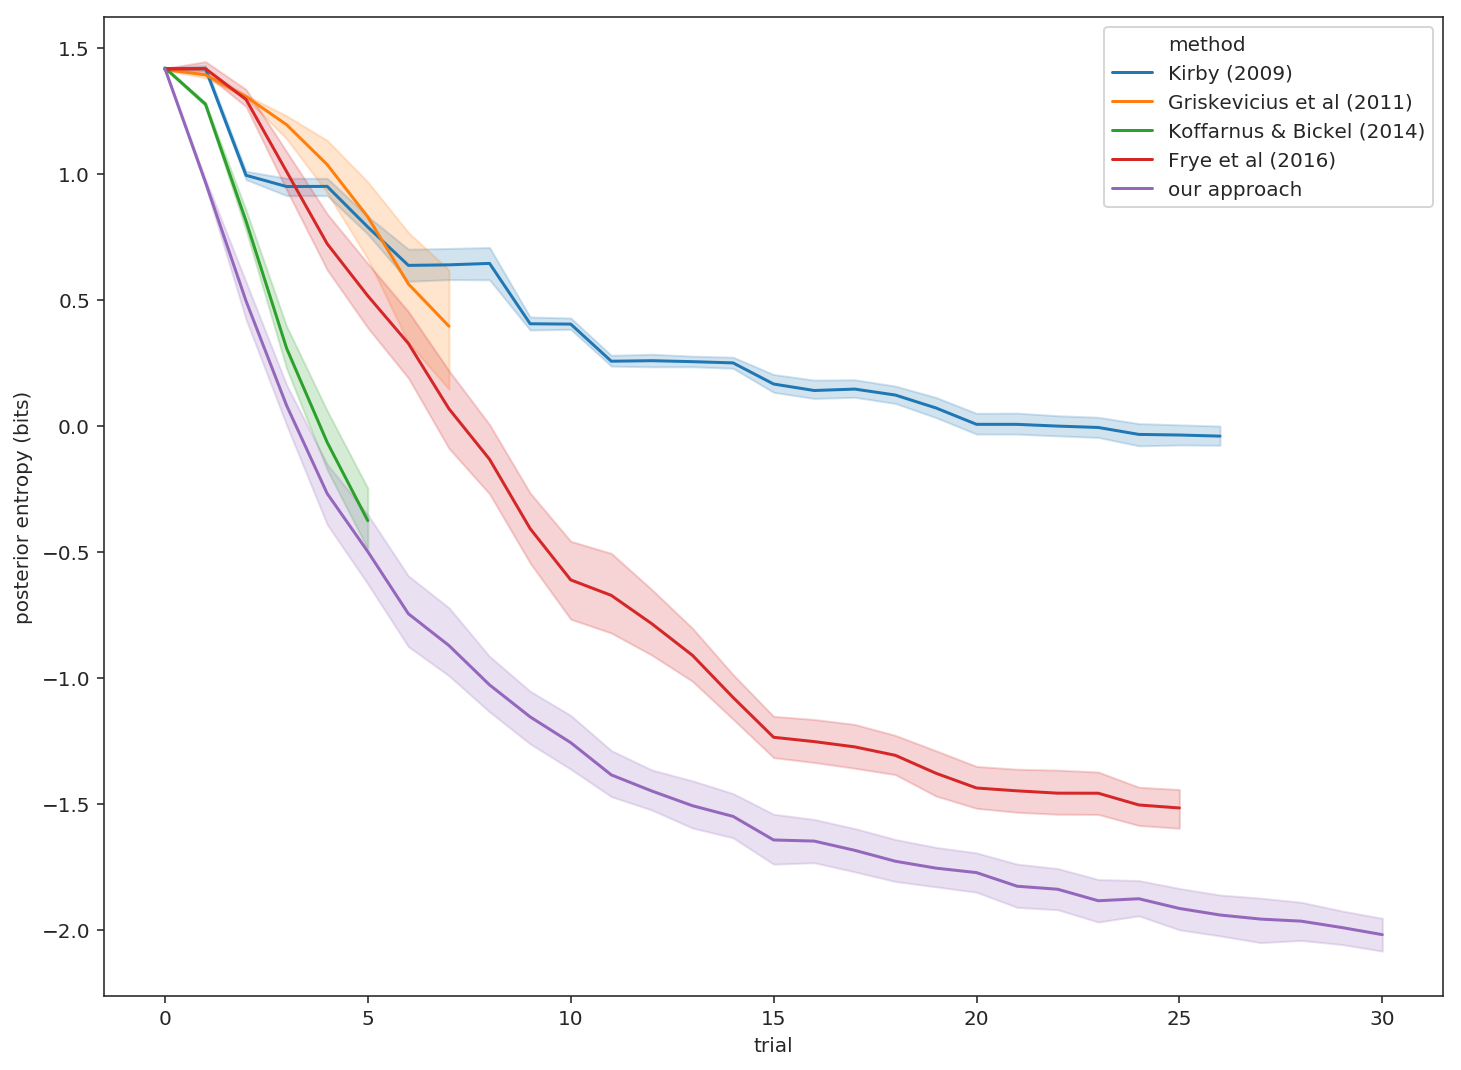

In [14]:
#sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(12, 9))

sns.lineplot(x='trial', y='entropy', hue='method', data=results, ax=ax)
ax.set_ylabel('posterior entropy (bits)')

What do the errorbars represent?
The documentation here https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial states that the default is the 95% confidence interval around the mean.

This is slightly ambigous. I have created an issue here https://github.com/mwaskom/seaborn/issues/1619

In [15]:
fig.savefig('posterior_entropy_reduction.pdf', bbox_inches='tight')